In [18]:
import pandas as pd
# xls to df
df = pd.read_excel('spxcalls20160331.xlsx')


In [19]:
df

,index,Date,Maturity,Strike,best_bid,best_offer,Call
0,0,2016-03-31,2016-04-15,1000,1056.2,1059.8,1058.00
1,1,2016-03-31,2016-04-15,1025,1031.3,1034.8,1033.05
2,2,2016-03-31,2016-04-15,1050,1006.3,1009.8,1008.05
3,3,2016-03-31,2016-04-15,1075,981.3,984.8,983.05
4,4,2016-03-31,2016-04-15,1100,956.3,959.8,958.05
...,...,...,...,...,...,...,...
2474,2474,2016-03-31,2016-06-10,500,1539.7,1560.4,1550.05
2475,2475,2016-03-31,2016-06-10,600,1439.8,1461.5,1450.65
2476,2476,2016-03-31,2016-06-10,700,1339.9,1361.3,1350.60
2477,2477,2016-03-31,2016-06-10,800,1240.1,1260.8,1250.45


FINN 6212 Homework 3
1. Starting with the data in the spreadsheet SPX20160331.xlsx, filter down to a set consisting 
of calls with moneyness in the range 80%-120% and 8 expirations (approximately 1 week
apart). Use this filtered dataset to draw the Black-Scholes volatility surface, both using the
textbook code and using a surface plotting function. The S&P 500 index value was 2059.74
on 3/31/2016. Assume a risk-free rate of 1.0% and a continuous dividend yield of 2.0%.


In [3]:
SP_value = 2059.74
SP_moneyness = [SP_value*.8, SP_value*1.2]
# filter df to be within SP_moneyness
df= df[(df['Strike']>SP_moneyness[0]) & (df['Strike']<SP_moneyness[1])]
# go to row 1416
df

,index,Date,Maturity,Strike,best_bid,best_offer,Call
102,102,2016-03-31,2016-04-15,1650,406.60,410.20,408.40
103,103,2016-03-31,2016-04-15,1655,401.60,405.20,403.40
104,104,2016-03-31,2016-04-15,1660,396.60,400.20,398.40
105,105,2016-03-31,2016-04-15,1665,391.60,395.20,393.40
106,106,2016-03-31,2016-04-15,1670,386.60,390.20,388.40
...,...,...,...,...,...,...,...
2466,2466,2016-03-31,2016-06-10,2300,0.15,0.45,0.30
2467,2467,2016-03-31,2016-06-10,2325,0.05,0.35,0.20
2468,2468,2016-03-31,2016-06-10,2350,0.00,0.30,0.15
2469,2469,2016-03-31,2016-06-10,2400,0.00,0.10,0.05


In [4]:

mlist = df.Maturity.unique()
mlist = list(mlist)
mlist.sort()
# Remove every other maturity so that 8 remain.
# could add one week to a maturity with datetime.timedelta(days=7)
mlist = mlist[::2]
mlist
# Filter df to only include mlist.
df = df[df['Maturity'].isin(mlist)]
df

,index,Date,Maturity,Strike,best_bid,best_offer,Call
526,526,2016-03-31,2016-06-17,1650,402.90,406.20,404.550
527,527,2016-03-31,2016-06-17,1660,392.90,396.20,394.550
528,528,2016-03-31,2016-06-17,1670,383.20,386.40,384.800
529,529,2016-03-31,2016-06-17,1675,378.30,381.60,379.950
530,530,2016-03-31,2016-06-17,1680,373.70,376.90,375.300
...,...,...,...,...,...,...,...
2350,2350,2016-03-31,2016-06-03,2225,0.45,0.65,0.550
2351,2351,2016-03-31,2016-06-03,2250,0.25,0.45,0.350
2352,2352,2016-03-31,2016-06-03,2300,0.10,0.30,0.200
2353,2353,2016-03-31,2016-06-03,2350,0.05,0.20,0.125


In [5]:

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from BSM_option_valuation import d1f, N, dN
mpl.rcParams['font.family'] = 'serif'

#
# Functions for Greeks
#


def BSM_delta(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton DELTA of European call option.

    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility

    Returns
    =======
    delta : float
        European call option DELTA
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    delta = N(d1)
    return delta


def BSM_gamma(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton GAMMA of European call option.

    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility

    Returns
    =======
    gamma : float
        European call option GAMM
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    gamma = dN(d1) / (St * sigma * math.sqrt(T - t))
    return gamma


def BSM_theta(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton THETA of European call option.

    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility

    Returns
    =======
    theta : float
        European call option THETA
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    theta = -(St * dN(d1) * sigma / (2 * math.sqrt(T - t)) +
              r * K * math.exp(-r * (T - t)) * N(d2))
    return theta


def BSM_rho(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton RHO of European call option.

    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility

    Returns
    =======
    rho : float
        European call option RHO
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    rho = K * (T - t) * math.exp(-r * (T - t)) * N(d2)
    return rho


def BSM_vega(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton VEGA of European call option.

    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility

    Returns
    =======
    vega : float
        European call option VEGA
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    vega = St * dN(d1) * math.sqrt(T - t)
    return vega

#
# Plotting the Greeks
#


def plot_greeks(function, greek, St, r, sigma, t):
    # # Model Parameters
    # St = 100.0  # index level
    # r = 0.05  # risk-less short rate
    # sigma = 0.2  # volatility
    # t = 0.0  # valuation date

    # Greek Calculations
    tlist = np.linspace(0.01, 1, 25)
    klist = np.linspace(80, 120, 25)
    V = np.zeros((len(tlist), len(klist)), dtype=np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i, j] = function(St, klist[j], t, tlist[i], r, sigma)

    # 3D Plotting
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(x, y, V)
    plot.set_xlabel('strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % greek)


In [6]:
# interest rate is .01, dividend rate is .02, r-d = -.01
r = .01
d = .02

r = r - d

S = SP_value
sigma = .2

import numpy as np
from scipy.stats import norm

df['IV'] = 0
df['TTM'] = 0

# TTM is days to maturity
df['TTM'] = (df['Maturity'] - df['Date']).dt.days
# sort df by TTM
df.sort_values(by=['TTM', 'Strike'], inplace=True)


<ipython-input-6-c6620ca64ff6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IV'] = 0
<ipython-input-6-c6620ca64ff6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TTM'] = 0
<ipython-input-6-c6620ca64ff6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
#
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad
# mpl.rcParams['font.family'] = 'serif'


def dN(x):
    ''' Probability density function of standard normal random variable x. '''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)


def N(d):
    ''' Cumulative density function of standard normal random variable x. '''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]


def d1f(St, K, T, r, sigma):
    ''' Black-Scholes-Merton d1 function.
        Parameters see e.g. BSM_call_value function. '''
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2)
          * (T )) / (sigma * math.sqrt(T ))
    return d1

# Valuation Functions
#

def BSM_vega(St, K, T, r, sigma):
    ''' Black-Scholes-Merton VEGA of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    vega : float
        European call option VEGA
    '''
    d1 = d1f(St, K, T, r, sigma)
    vega = St * dN(d1) * math.sqrt(T )
    return vega
    
def BSM_call_value(St, K, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European call option value.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    call_value : float
        European call present value at t
    '''
    d1 = d1f(St, K, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T )
    call_value = St * N(d1) - math.exp(-r * (T )) * K * N(d2)
    return call_value


def implied_volatility_call(C, S, K, T, r, tol=0.00001,
                            max_iterations=50):
    '''
    :param C: Observed call price
    :param S: Asset price
    :param K: Strike Price
    :param T: Time to Maturity
    :param r: riskfree rate
    :param tol: error tolerance in result
    :param max_iterations: max iterations to update vol
    :return: implied volatility in percent
    '''
    ### assigning initial volatility estimate for input in Newton_rap procedure
    sigma = 0.1

    for i in range(max_iterations):

        ### calculate difference between blackscholes price and market price with
        ### iteratively updated volality estimate
        diff = BSM_call_value(S, K, T, r, sigma) - C

        ###break if difference is less than specified tolerance level
        if abs(diff) < tol:
            print(f'found on {i}th iteration')
            print(f'difference is equal to {diff}')
            break

        ### use newton rapshon to update the estimate
        sigma = sigma - diff / BSM_vega(S, K, T, r, sigma)

    return sigma



In [8]:
# Call implied volatility function on each row to compare market Call price to estimated BSM price
# When they equal, we have determined the implied volatility
# iterate throudh df and apply implied volatility function to each row
for i, row in df.iterrows():
    print ('row', i)
    df.loc[i, 'IV'] = implied_volatility_call(row['Call'], S, row['Strike'], row['TTM'], r)

# df['IV'] = df.apply(lambda row: implied_volatility_call(row['Call'], S, row['Strike'], row['TTM'], r), axis=1)

<ipython-input-8-5413bb46d20a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'IV'] = implied_volatility_call(row['Call'], S, row['Strike'], row['TTM'], r)


row 665
found on 3th iteration
difference is equal to 6.177742761792615e-10
row 666
found on 3th iteration
difference is equal to 2.8421709430404007e-11
row 667
found on 3th iteration
difference is equal to 1.3642420526593924e-12
row 668
found on 2th iteration
difference is equal to 1.4321331036626361e-06
row 669
found on 2th iteration
difference is equal to 4.672347131418064e-08
row 670
found on 2th iteration
difference is equal to 8.230927051045e-11
row 671
found on 2th iteration
difference is equal to 4.099774741916917e-09
row 672
found on 2th iteration
difference is equal to 7.200810614449438e-08
row 673
found on 2th iteration
difference is equal to 1.749106104398379e-07
row 674
found on 2th iteration
difference is equal to 3.6565359096130123e-07
row 675
found on 2th iteration
difference is equal to 9.580476216797251e-07
row 676
found on 2th iteration
difference is equal to 1.699449398984143e-06
row 677
found on 2th iteration
difference is equal to 2.5621009172027698e-06
row 678
fo

In [9]:
df

,index,Date,Maturity,Strike,best_bid,best_offer,Call,IV,TTM
665,665,2016-03-31,2016-04-06,1650,406.90,411.10,409.000,0.119915,6
666,666,2016-03-31,2016-04-06,1675,381.90,386.10,384.000,0.115108,6
667,667,2016-03-31,2016-04-06,1700,356.90,361.10,359.000,0.110264,6
668,668,2016-03-31,2016-04-06,1725,332.10,336.30,334.200,0.105495,6
669,669,2016-03-31,2016-04-06,1740,317.10,321.30,319.200,0.102536,6
...,...,...,...,...,...,...,...,...,...
637,637,2016-03-31,2016-06-17,2350,0.05,0.50,0.275,0.033534,78
638,638,2016-03-31,2016-06-17,2375,0.05,0.20,0.125,0.031842,78
639,639,2016-03-31,2016-06-17,2400,0.05,0.15,0.100,0.031640,78
640,640,2016-03-31,2016-06-17,2425,0.00,0.10,0.050,0.030450,78


In [10]:
# X = df['Strike'], Y = df['TTM'], Z = df['IV']
plot_df = df[['Strike', 'TTM', 'IV']]



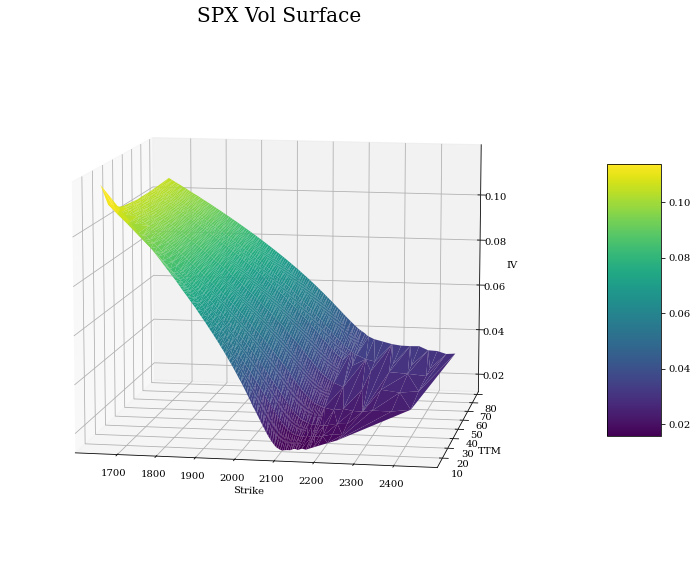

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Make the plot
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(plot_df['Strike'], plot_df['TTM'], plot_df['IV'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('Strike')
ax.set_ylabel('TTM')
ax.set_zlabel('IV')
# rotate the image here
ax.view_init(elev=10, azim=-80)
plt.title('SPX Vol Surface', fontsize=20)
# make image larger
# for some reason, run this cell twice to make the image larger?
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()
 